In [2]:
from copy import deepcopy
import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt

In [48]:
def jacobian(a, b, r, theta, phi):
    a_ = a - r * theta
    b_ = b - r * phi
    J11 = -r * np.cos(theta) - a_ * np.sin(theta) + r * np.cos(theta)
    J12 = r * np.cos(phi) + b_ * np.sin(phi) - r * np.cos(phi)
    J21 = -r * np.sin(theta) + a_ * np.cos(theta) + r * np.sin(theta)
    J22 = r * np.sin(phi) - b_ * np.cos(phi) - r * np.sin(phi)
    return np.array([[J11, J21], [J12, J22]])

def f(a, b, r, d, theta, phi):
    a_ = a - r * theta
    b_ = b - r * phi
    fx = a_ * np.cos(theta) + r * np.sin(theta) - b_ * np.cos(phi) - r * np.sin(phi) + d
    fy = a_ * np.sin(theta) - r * np.cos(theta) - b_ * np.sin(phi) + r * np.cos(phi)
    return np.array([fx, fy])


In [64]:
try:
    de = np.linalg.inv(jacobian(10.0, 11.0, 0.05, np.pi/4, np.pi/4))
    print(de)
except:
    print(np.nan)

[[1.12589991e+15 1.02317866e+15]
 [1.12589991e+15 1.02317866e+15]]


In [78]:
# const
a = 1.0
b = 1.0
r = 0.05
d = 0.5
# initialize
theta = np.pi / 4
phi = np.pi / 4
psi = np.array([theta, phi])
# newton method
i = 0
err = 1.0
while(err > 0.1e-3):
    try:
        J = jacobian(a, b, r, psi[0], psi[1])
        delta = np.dot(np.linalg.inv(J), -f(a, b, r, d, psi[0], psi[1]))
        psi = psi + delta
    except:
        delta = np.nan        
    print(i, delta, psi)
    
    i = i + 1
    if (i > 30):
        break

0 nan [0.78539816 0.78539816]
1 nan [0.78539816 0.78539816]
2 nan [0.78539816 0.78539816]
3 nan [0.78539816 0.78539816]
4 nan [0.78539816 0.78539816]
5 nan [0.78539816 0.78539816]
6 nan [0.78539816 0.78539816]
7 nan [0.78539816 0.78539816]
8 nan [0.78539816 0.78539816]
9 nan [0.78539816 0.78539816]
10 nan [0.78539816 0.78539816]
11 nan [0.78539816 0.78539816]
12 nan [0.78539816 0.78539816]
13 nan [0.78539816 0.78539816]
14 nan [0.78539816 0.78539816]
15 nan [0.78539816 0.78539816]
16 nan [0.78539816 0.78539816]
17 nan [0.78539816 0.78539816]
18 nan [0.78539816 0.78539816]
19 nan [0.78539816 0.78539816]
20 nan [0.78539816 0.78539816]
21 nan [0.78539816 0.78539816]
22 nan [0.78539816 0.78539816]
23 nan [0.78539816 0.78539816]
24 nan [0.78539816 0.78539816]
25 nan [0.78539816 0.78539816]
26 nan [0.78539816 0.78539816]
27 nan [0.78539816 0.78539816]
28 nan [0.78539816 0.78539816]
29 nan [0.78539816 0.78539816]
30 nan [0.78539816 0.78539816]


In [85]:
df = pd.DataFrame()
# theta [rad]
dt = np.pi / 180
df['theta'] = np.arange(0, 2 * np.pi + dt, dt)
# x, y
a = 1.0
b = 1.5
d = 0.25
r = 0.1
df['x1'] = (a - r * df.theta) * np.cos(df.theta) + r * np.sin(theta)
df['y1'] = (a - r * df.theta) * np.sin(df.theta) - r * np.cos(theta)
df['x2'] = (b - r * df.theta) * np.cos(df.theta) + r * np.sin(theta) - d
df['y2'] = (b - r * df.theta) * np.sin(df.theta) - r * np.cos(theta)


<IPython.core.display.Javascript object>


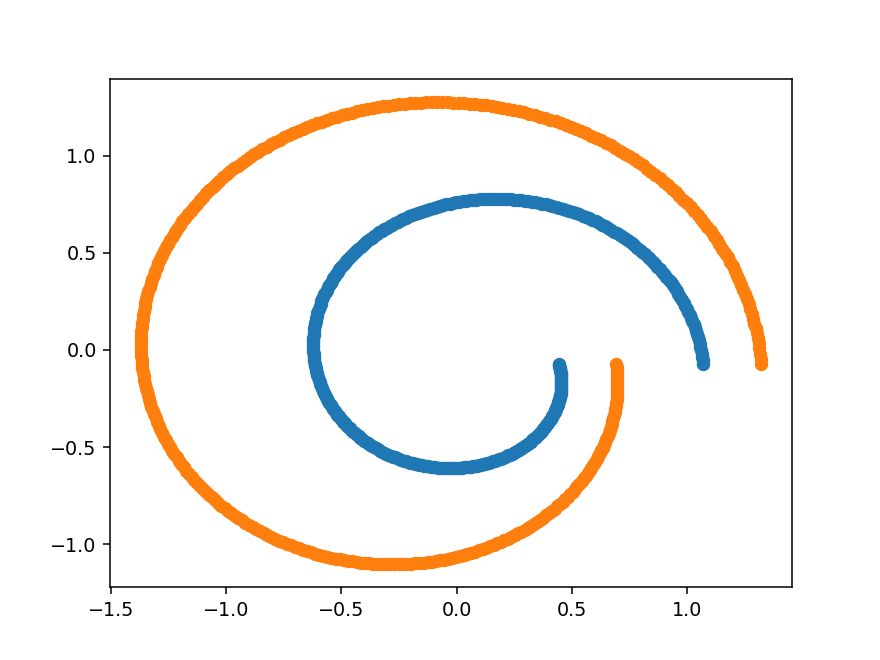

In [86]:
plt.scatter(df.x1, df.y1)
plt.scatter(df.x2, df.y2)
plt.show()